<a href="https://colab.research.google.com/github/fash098/Yes_Bank_Stock_Price_Prediction/blob/main/ML_Regression_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Stock Closing Price Prediction - Yes Bank



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

This project aims to tackle the intricate challenge of predicting the closing stock price of Yes Bank, a pivotal concern for investors, stakeholders, and market participants. Being a significant private sector bank in India, Yes Bank has faced notable obstacles lately, encompassing a considerable volume of non-performing loans and involvement in fraudulent activities. These disturbances triggered regulatory interventions by the Reserve Bank of India, intensifying the complexity and unpredictability of forecasting Yes Bank's stock prices.

To address this, the project employs an extensive dataset spanning monthly stock price records since the bank's inception. This dataset encompasses crucial metrics like monthly closing, opening, highest, and lowest prices. The primary aim is to construct predictive models proficient in capturing the intricate trends and dynamics within Yes Bank's stock prices, while accounting for the turbulent events and uncertainties linked to the bank's performance.


A successful forecast of Yes Bank's closing stock price holds the potential to furnish valuable insights, facilitating judicious investment decisions for stakeholders.






# **GitHub Link -**

https://github.com/fash098/Yes_Bank_Stock_Price_Prediction

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

# ML Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

#Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
# Mounting the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the file
stock_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project/data_YesBank_StockPrices.csv')

### Dataset First View

In [4]:
# Dataset First Look
stock_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
stock_df.shape

(185, 5)

### Dataset Information

In [6]:
# Dataset Info
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(stock_df[stock_df.duplicated()])

#There are no duplicate values in this dataset.

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(stock_df.isnull().sum())

# There are no null values present in the dataset.

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


<Axes: >

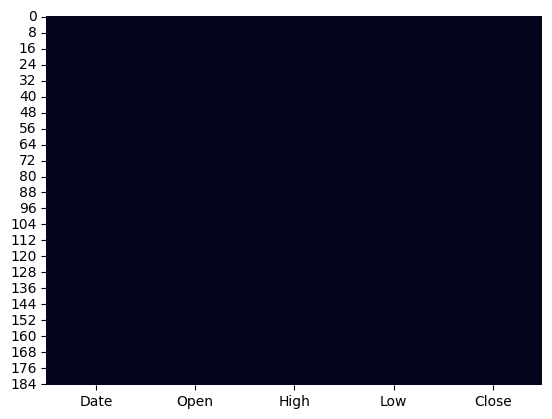

In [9]:
# Visualizing the missing values
sns.heatmap(stock_df.isnull(), cbar=False)

#No significant observation since the data has 0 null values.

### What did you know about your dataset?

- The dataset contains 185 rows and 5 columns. Which means among the 185 datapoints each have 5 features.

- The 5 features are :
     - Date (Date of each entry)
     - Open (Opening price of the stock on the specific date)
     - High (Highest price of the stock on the specific date)
     - Low  (Lowest price of the stock on the specific date)
     - Close (Closing price of the stock on the specific date)

- Datatypes of features include 'object' and 'float'. Since the datatype of date is object, it needs to be changed to datetime to carryout any manipulations pertaning to date, time, week, month or year.

- The dataset contains no duplicates or null values.



## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
# Dataset Describe
stock_df.describe(include = 'all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description

- The dataset contains 5 variables which are as follows.

- The 5 features/variables are :
     - Date (Date of each entry)
     - Open (Opening price of the stock on the specific date)
     - High (Highest price of the stock on the specific date)
     - Low  (Lowest price of the stock on the specific date)
     - Close (Closing price of the stock on the specific date)

The dataset provides a comprehensive overview of the monthly performance of Yes Bank stock, including the opening, highest, lowest, and closing prices for each month since its listing on the stock exchange.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in stock_df.columns.tolist():
  print("No. of unique values in ",i,"is",stock_df[i].nunique())

No. of unique values in  Date is 185
No. of unique values in  Open is 183
No. of unique values in  High is 184
No. of unique values in  Low is 183
No. of unique values in  Close is 185


In [13]:
for i in stock_df.columns:
  print(f"The unique values in '{i}' are:\n\n {stock_df[i].unique()}\n\n")



The unique values in 'Date' are:

 ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Before performing the necessary data wrangling steps, its advised to create a copy of the original dataframe.

df = stock_df.copy()
print(df.head)

<bound method NDFrame.head of        Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]>


Steps to perform on the dataset :

1) Convert the datatype of the feature 'date' from 'object' to 'datetime'. As otherwise it can be an obstacle when we need to draw insights related to date or time of the observations.

2) There were no null values or duplicates present in the data. So no action required related to that.


In [15]:
# Converting the datatype from object to datetime.

df['Date'] = df['Date'].apply(lambda x:datetime.strptime(x,"%b-%y"))

In [16]:
# Checking the datatype of the columns after changing datatype of date

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB
None


In [17]:
# Setting date as index
df.set_index('Date',inplace=True)

In [18]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

- Made a copy of the dataset.
- Converted the datatype under the column 'Date' from object to datetime.
- Set 'date' as the index

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [19]:
# Bifurcating dependent and independent variables ;

dep_var = df['Close']
indep_var = df[['High','Low','Open']]



*** Chart - 1 | Univariate Analysis | Dependent Variable***

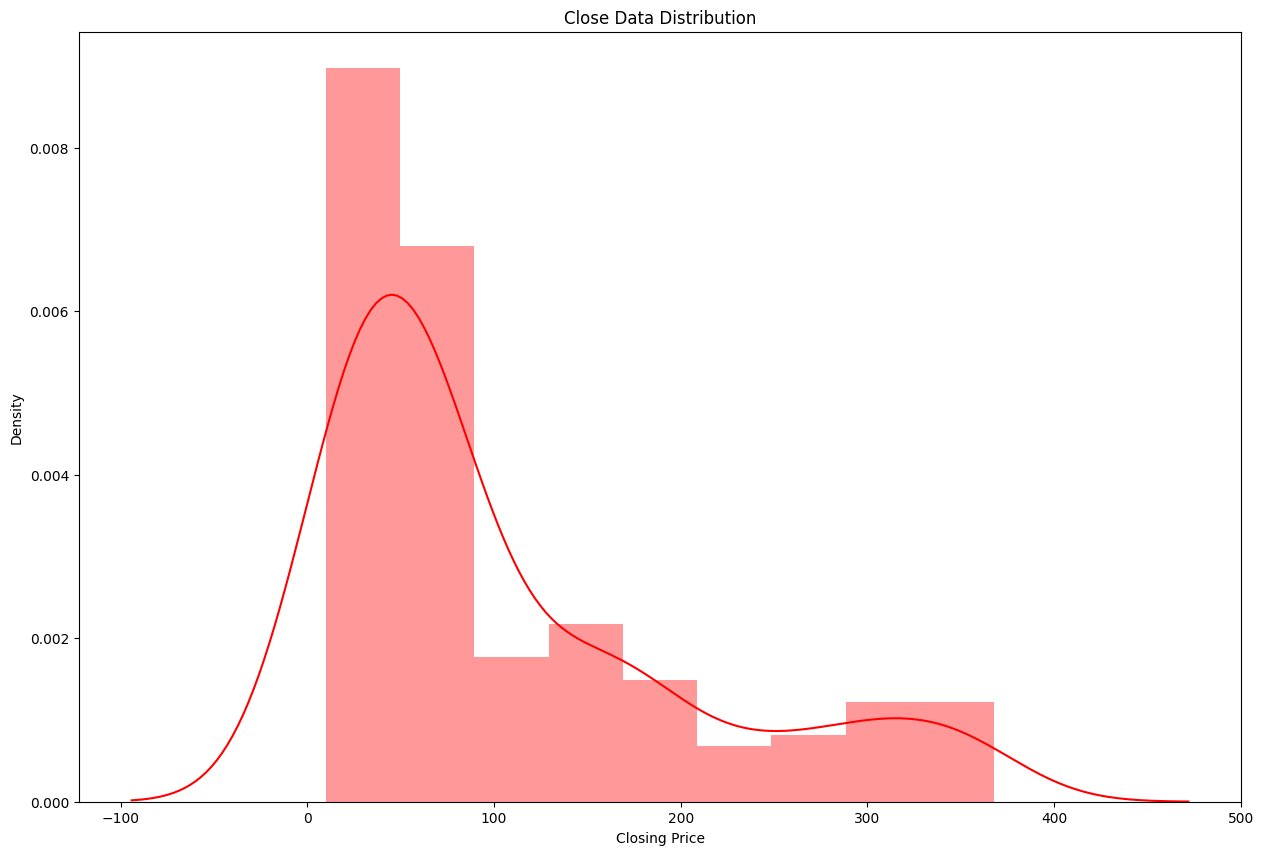

In [20]:
# Chart - 1 visualization code
# Understanding the distribution of 'Close Price'

plt.figure(figsize=(15,10))
sns.distplot(dep_var,color="r")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

# Right skewed distribution


##### 1. Why did you pick the specific chart?

Distribution plot is used basically for univariant set of observations and visualizes it through a histogram.  

##### 2. What is/are the insight(s) found from the chart?

In the distribution, the tail is skewed towards right so it is understood that the data under 'closing_price' is rightly skewed.

##### 3. Will the gained insights help creating a positive business impact?
 Most right-skewed distributions have the mean to the right of the median which is an important analysis for business.


#### Chart - 2 | Dist Plot & Box Plot

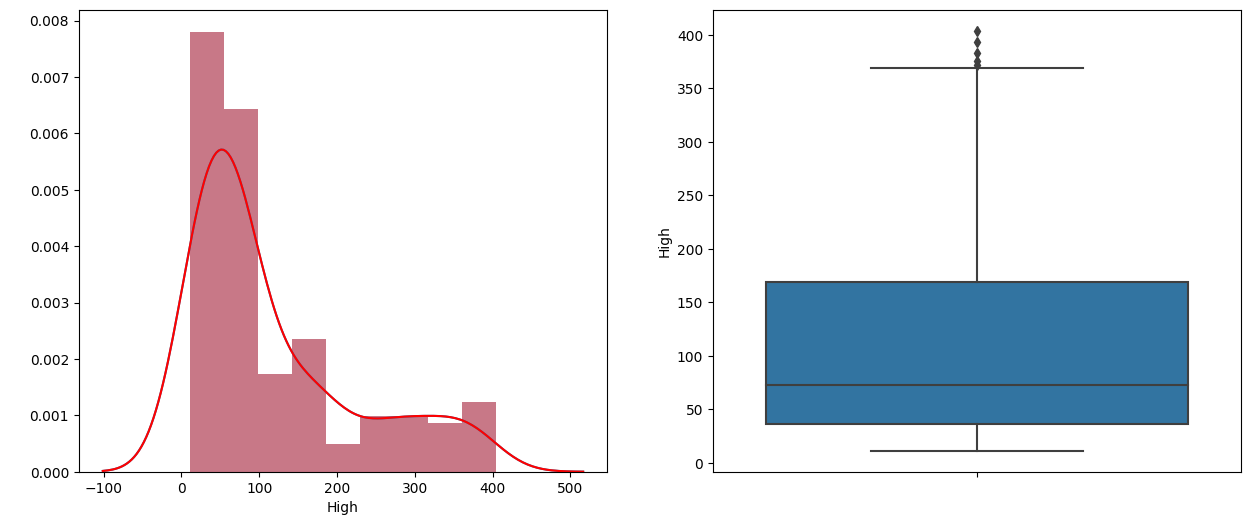

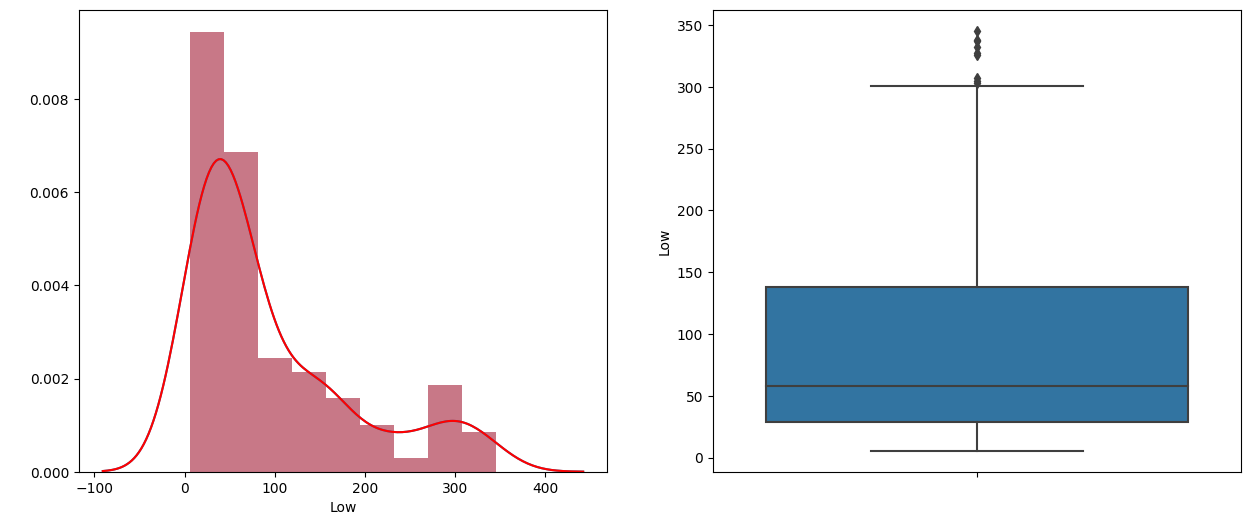

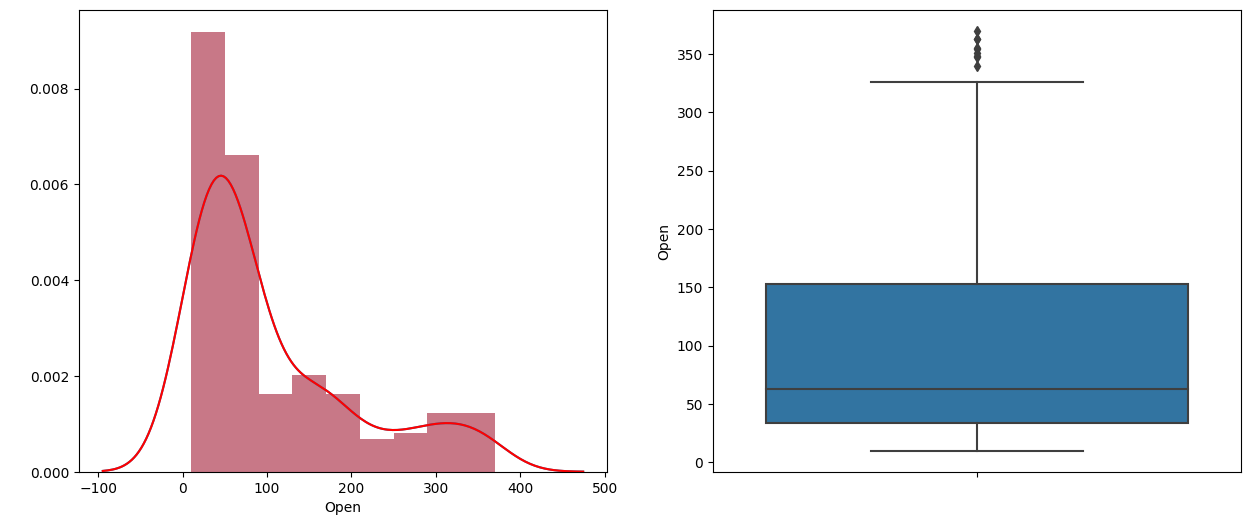

In [21]:
# Chart - 2 visualization code
# visualise the data
#plots for independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var].dropna())
    fig = sns.distplot(df[var],color = 'r')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)




##### 1. Why did you pick the specific chart?

- A Distplot or distribution plot, depicts the variation in the data distribution.

- A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.



##### 2. What is/are the insight(s) found from the chart?

All the features are positively skewed and there is presence of outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This means that the most extreme values are on the right side. As an investor, you may find that you have some small losses/gains with a positive skew.

#### Chart - 3

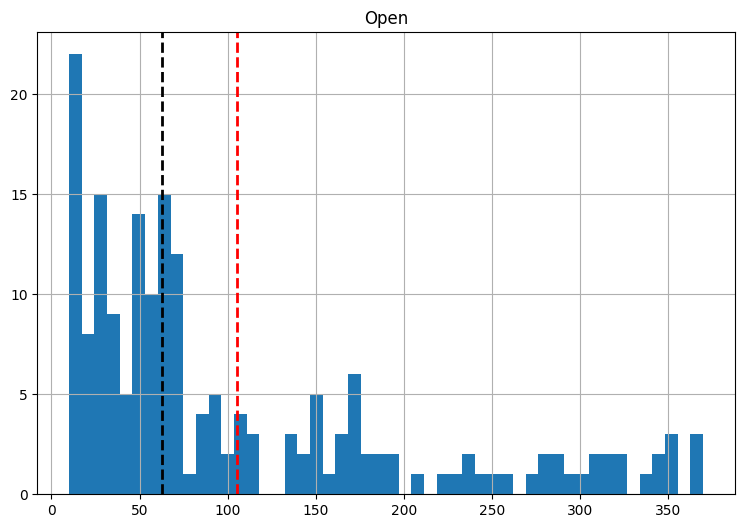

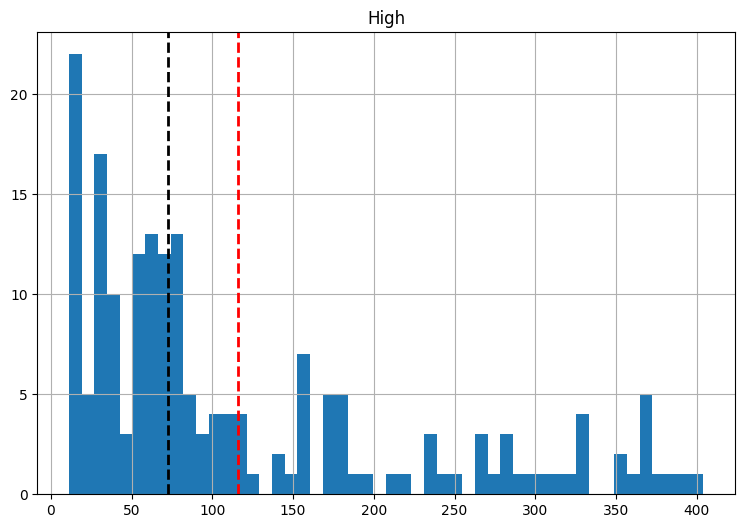

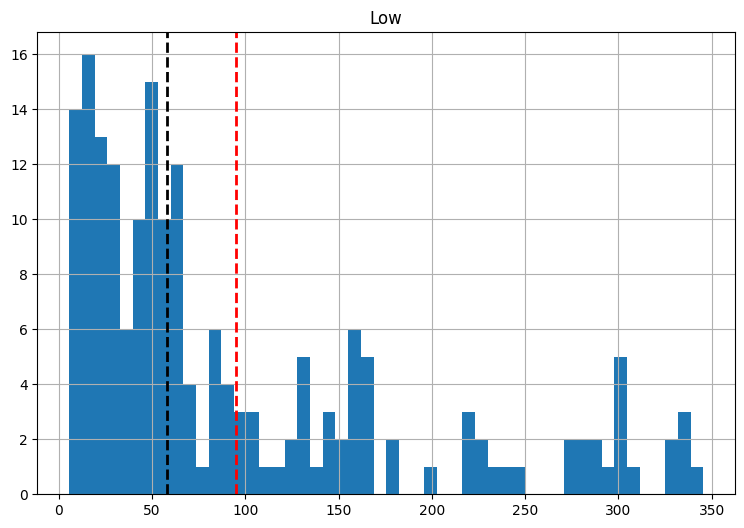

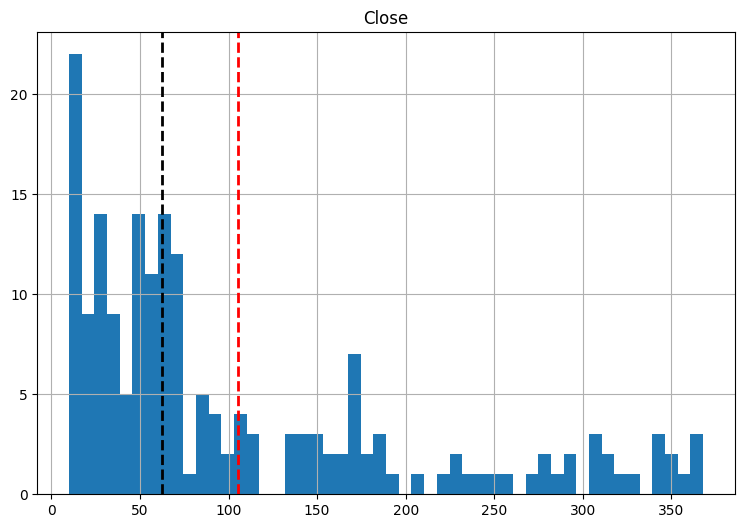

In [22]:
# Chart - 3 visualization code
# To understand the skewness
# Check for skewness in the dataset
numeric_features = df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

# Chart - 4 |


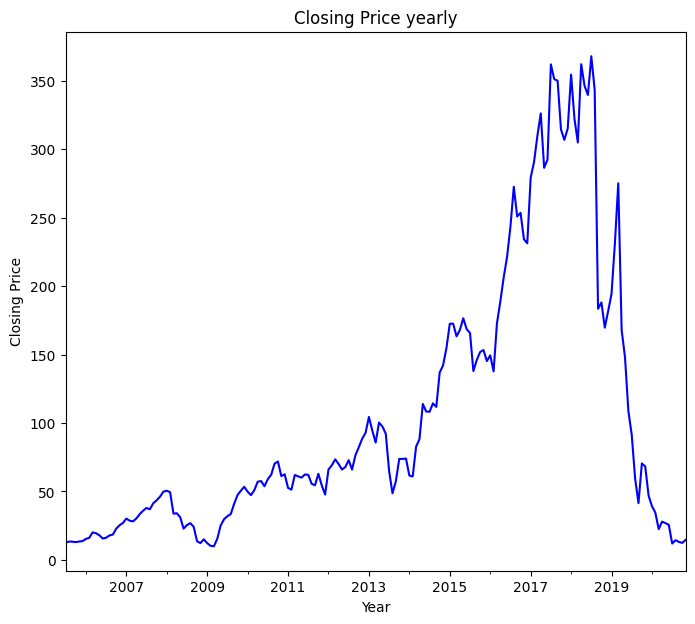

In [106]:
plt.figure(figsize=(8,7))
df['Close'].plot(color = 'b')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

1. Why did you pick the specific chart?

To visualise how closing price varies in each year.

2. What is/are the insight(s) found from the chart?

From the plot, it is evident that after the fraud case in 2018, the closing price took a huge hit and dropped significantly.



3. Will the gained insights help creating a positive business impact?

Since we surely know that the fraud case of 2018 has greatly impacted the stock price of yes bank we can come up with strategies to improve the reputation and trust of the bank among people

** Chart - 5 | Bivariate Analysis | Independent Variable**

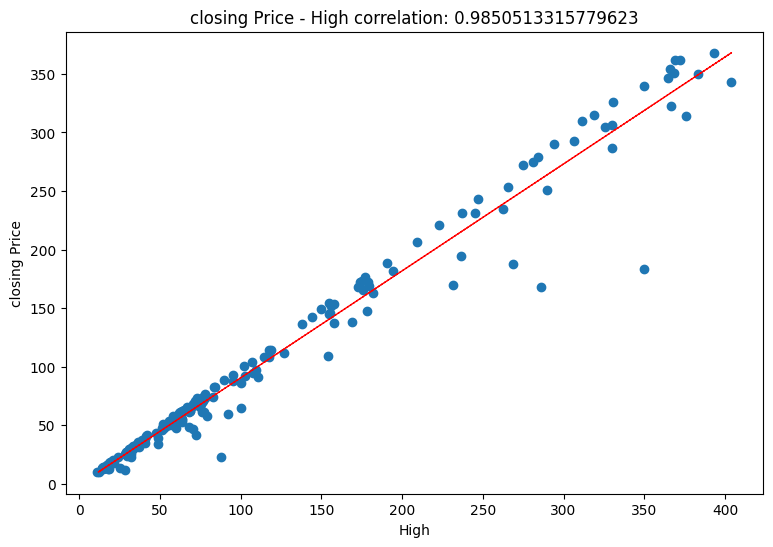

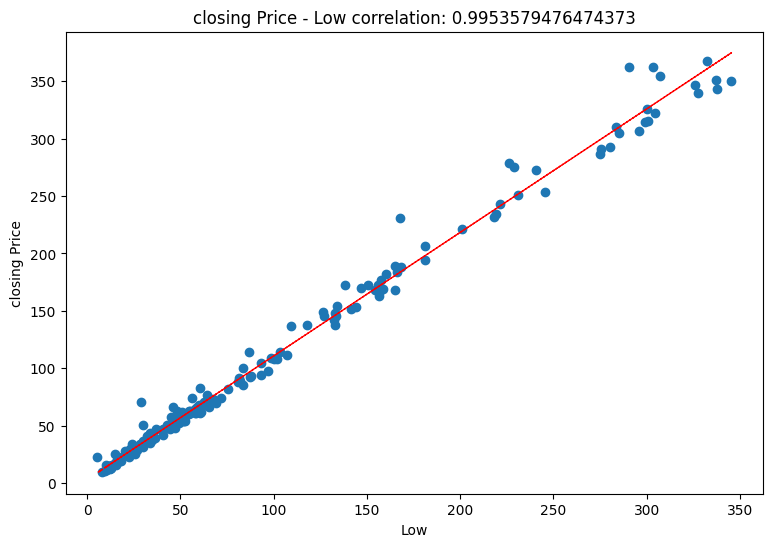

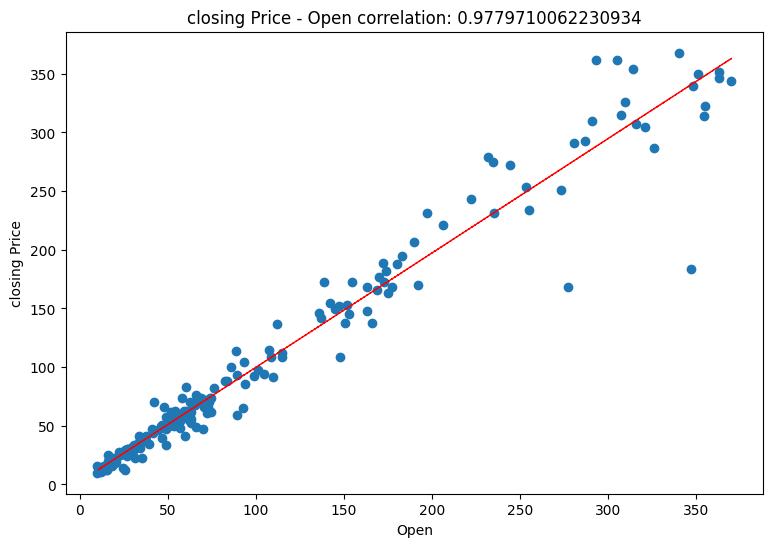

In [23]:
# Chart - 4 visualization code
#scatter plot between dependent variable with all independent variables.
for col in indep_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Close'], 1)
   y_hat = np.poly1d(z)(df[col])

   plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot helps us to understand the the relationship or correlation of dependent variables to that of independent variables.

##### 2. What is/are the insight(s) found from the chart?

From the plot it is understood that all independent variables are highly correlated and is in linearly related to dependent variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When independent variables are highly correlated to y variable, it means that linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 6 | Multivariate - Heat Map




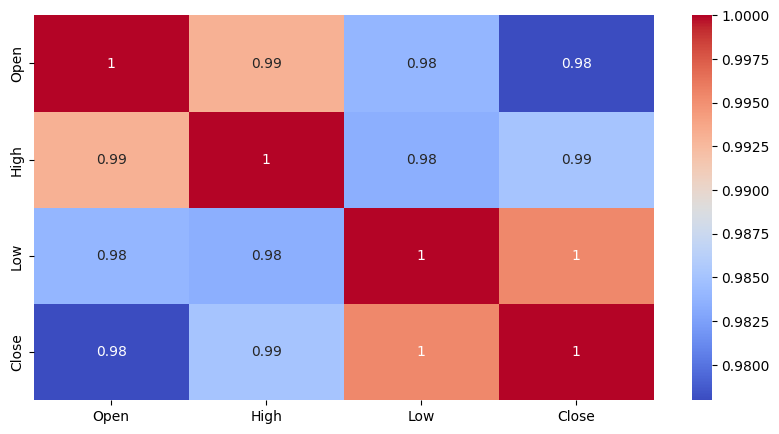

In [24]:
# Chart - 5 visualization code
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()


##### 1. Why did you pick the specific chart?

Correlation between features is typically visualized using a correlation matrix which in return is visualized with a heatmap showing the correlation factor of each feature in the dataset.

##### 2. What is/are the insight(s) found from the chart?

All the features are highly correlated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean closing prices between the first half and the second half of the dataset.

Alternate Hypothesis (H1): There is a significant difference in the mean closing prices between the first half and the second half of the dataset

#### 2. Perform an appropriate statistical test.

In [25]:
# Perform Statistical Test to obtain P-Value

# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy import stats

# Divide the dataset into two halves: first half and second half
first_half = df['Close'][df.index.year <= 2017]
second_half = df['Close'][df.index.year >= 2018]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half)
mean2 = np.mean(second_half)
std1 = np.std(first_half)
std2 = np.std(second_half)

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

# Calculate the standard error of the difference between means
standard_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the z-score
z = (mean1 - mean2) / standard_error

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")

Reject the null hypothesis. There is a significant difference in means.


##### Which statistical test have you done to obtain P-Value?

Z test, as i my data has more than 30 records.

##### Why did you choose the specific statistical test?

Since the dataset has more than 30 records, and we can calculate mean and sd from it.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [26]:
# Handling Missing Values & Missing Value Imputation
# No missing values present in the dataset

#### What all missing value imputation techniques have you used and why did you use those techniques?

No Action Required.

### 2. Handling Outliers

In [27]:
# Handling Outliers & Outlier treatments
df1 = df.copy()
for col in numeric_features:
  # Using IQR method to define the range of inliners:
  q1, q3, median = df1[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df1[col] = np.where(df[col] > upper_limit, median,np.where(
                         df[col] < lower_limit,median,df1[col]))


##### What all outlier treatment techniques have you used and why did you use those techniques?

The technique used here is Interquartile Range (IQR) method. This helps in identifying and removing outliers in the continuous columns of the dataset. This technique was chosen because it is a robust method for detecting outliers that is not affected by the presence of extreme values. The IQR is calculated as the difference between the 75th and 25th percentiles of the data, and any value that falls below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR is considered an outlier. By using this method, I was able to identify and remove outliers in a consistent and objective manner.

### 3. Categorical Encoding

In [28]:
# Encode your categorical columns
# Not applicable as the data is numerical

#### What all categorical encoding techniques have you used & why did you use those techniques?

Not Applicable.

### 4. Textual Data Preprocessing - Not Required
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [29]:
# Expand Contraction

#### 2. Lower Casing

In [30]:
# Lower Casing

#### 3. Removing Punctuations

In [31]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [32]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [33]:
# Remove Stopwords

In [34]:
# Remove White spaces

#### 6. Rephrase Text

In [35]:
# Rephrase Text

#### 7. Tokenization

In [36]:
# Tokenization

#### 8. Text Normalization

In [37]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [38]:
# POS Taging

#### 10. Text Vectorization

In [39]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

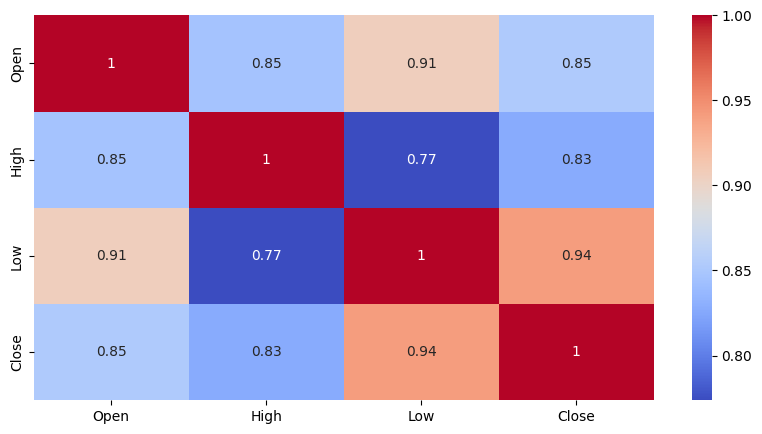

In [40]:
#correlation plot
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')
plt.show()


In [41]:
#Multicollinearity
#VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [42]:
calc_vif(indep_var)

,variables,VIF
0,High,167.057523
1,Low,71.574137
2,Open,175.185704


In [43]:
# Manipulate Features to minimize feature correlation and create new features

# As all the independent variables are highly correlated, I can create a new feature by takinig mean from the each record of independent variables. This will avoid MultiCollinearity and also overfitting of the model.


df1['Mean_OHL'] = df1[['Open', 'High', 'Low']].mean(axis=1)
df1.head()

,Open,High,Low,Close,Mean_OHL
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.750000
2005-08-01,12.58,14.88,12.55,13.42,13.336667
2005-09-01,13.48,14.87,12.27,13.30,13.540000
2005-10-01,13.20,14.47,12.40,12.99,13.356667
2005-11-01,13.35,13.88,12.88,13.41,13.370000


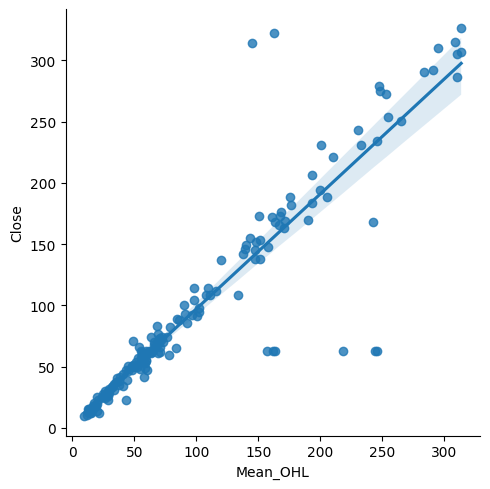

In [44]:
#checking for linear relationship b/w dependent variable and Independent variable

sns.lmplot(x='Mean_OHL', y='Close', fit_reg=True, data=df1)

<Axes: xlabel='Mean_OHL', ylabel='Density'>

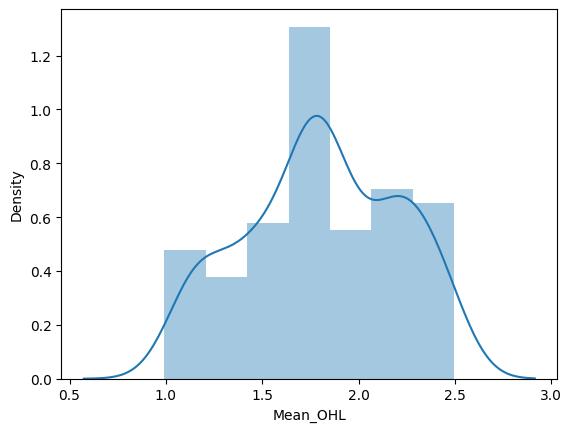

In [45]:
x=np.log10(df1['Mean_OHL'])
sns.distplot(x)

In [46]:
# use lags as additional features
'''The lag features are basically the target variable but shifted with a period of time,
it is used to know the behavior of our target value in the past, maybe a day before, a week or a month'''

for i in range(1, 13):
    df1["lag_{}".format(i)] = df1.Mean_OHL.shift(i)

In [47]:
df1.head()

,Open,High,Low,Close,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-01,12.58,14.88,12.55,13.42,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-01,13.48,14.87,12.27,13.30,13.540000,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-01,13.20,14.47,12.40,12.99,13.356667,13.540000,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-11-01,13.35,13.88,12.88,13.41,13.370000,13.356667,13.540000,13.336667,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Feature Selection

In [48]:

#independent_variables1=['Open','Price_Range']
#independent_variables1
y_dep = df1.dropna().Close.values
x_indep = df1.dropna().drop(['Close','Open','High','Low'], axis=1)

##### What all feature selection methods have you used  and why?

Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values.

NOTE - I tried to run an analysis by converting high and low into day range and my error increased by 3x-4x, which further proved all data points here are necessary.

##### Which all features you found important and why?

Open,High, close. This must be included because, on opening price is high and when low, there is a significant change in closing price.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [49]:
# Transform Your data

x_indep['Mean_OHL'] = np.log10(x_indep['Mean_OHL'])

# Create the dependent variable data
Y = np.log10(y_dep)

x_indep.values

array([[ 1.19516137, 16.66666667, 19.13333333, ..., 13.54      ,
        13.33666667, 12.75      ],
       [ 1.22358246, 15.67333333, 16.66666667, ..., 13.35666667,
        13.54      , 13.33666667],
       [ 1.25269125, 16.73333333, 15.67333333, ..., 13.37      ,
        13.35666667, 13.54      ],
       ...,
       [ 1.15014216, 13.67      , 21.66666667, ..., 68.76666667,
        49.23333333, 57.66666667],
       [ 1.11859537, 14.13      , 13.67      , ..., 60.4       ,
        68.76666667, 49.23333333],
       [ 1.11969568, 13.14      , 14.13      , ..., 43.98333333,
        60.4       , 68.76666667]])

In [50]:
# Checking skew after log transformation


Data was skewed and needed to be transformed.
We performed 2 data transformation methods such as square root transformation and log transformation.

### 6. Data Scaling

In [51]:
# Scaling your data

#after train_test_split
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_indep.values)

##### Which method have you used to scale you data and why?

Method used here is Standard Scaler

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [52]:
# DImensionality Reduction (If needed)
#Dimentionality reduction is not required

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Since we have only very few features here dimentionality reduction is not required.

### 8. Data Splitting

In [53]:
# Split your data to train and test. Choose Splitting ratio wisely.

#splitting the data into a train and a test set.

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state = 1)
print(x_train.shape)
print(x_test.shape)

(138, 13)
(35, 13)


##### What data splitting ratio have you used and why?

I have used 80 percent of the data for training the model and 20 % for testing the model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [54]:
# Handling Imbalanced Dataset (If needed)
close_price=df['Close'].value_counts()
close_price

12.46     1
137.67    1
176.52    1
168.60    1
165.74    1
         ..
61.21     1
62.54     1
52.59     1
51.29     1
14.67     1
Name: Close, Length: 185, dtype: int64

In [55]:
#Handling imbalanced dataset - Not required.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - Linear Regression


In [56]:
# ML Model - 1 Implementation

# Fit the Algorithm
reg_with_transformation = LinearRegression().fit(x_train, y_train)


In [57]:


reg_with_transformation.score(x_train,y_train)

0.9377546572957077

In [58]:


# Predicting our test data.
y_train_pred_with_transformation= reg_with_transformation.predict(x_train)
y_test_pred_with_transformation = reg_with_transformation.predict(x_test)
#y_test_pred_without_transformation = reg_without_transformation.predict(X_test)

In [59]:

comparision_trans = pd.DataFrame(zip(10**(y_test), 10**(y_test_pred_with_transformation)), columns = ['actual', 'pred'])
comparision_trans.head()


,actual,pred
0,88.14,87.673780
1,149.38,124.071288
2,49.42,53.104526
3,70.07,74.270809
4,62.54,64.174717


In [60]:
train_MAE = mean_absolute_error(10**(y_train),(10**y_train_pred_with_transformation))
print(f"Mean Absolute Error : {train_MAE}")


train_MSE  = mean_squared_error(10**(y_train), 10**(y_train_pred_with_transformation))
print("MSE :" , train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("RMSE :" ,train_RMSE)

train_r2 = r2_score(10**(y_train), 10**(y_train_pred_with_transformation))
print("R2 :" ,train_r2)

train_adjusted_r2=1-(1-r2_score(10**(y_train), 10**(y_train_pred_with_transformation)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2)

print('\n')


MAE = mean_absolute_error(10**(y_test),(10**y_test_pred_with_transformation))
print(f"Mean Absolute Error : {MAE}")

MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred_with_transformation))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred_with_transformation))
print("R2 :" ,r2)

adjusted_r2=1-(1-r2_score(10**(y_test), 10**(y_test_pred_with_transformation)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2)

Mean Absolute Error : 14.193371013506935
MSE : 701.2724422280035
RMSE : 26.481549090413942
R2 : 0.8930782207781346
Adjusted R2: 0.8818686794081003


Mean Absolute Error : 21.065261914346816
MSE : 2105.6989880671895
RMSE : 45.88789587753168
R2 : 0.6826928396783494
Adjusted R2: 0.4862645975744704


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

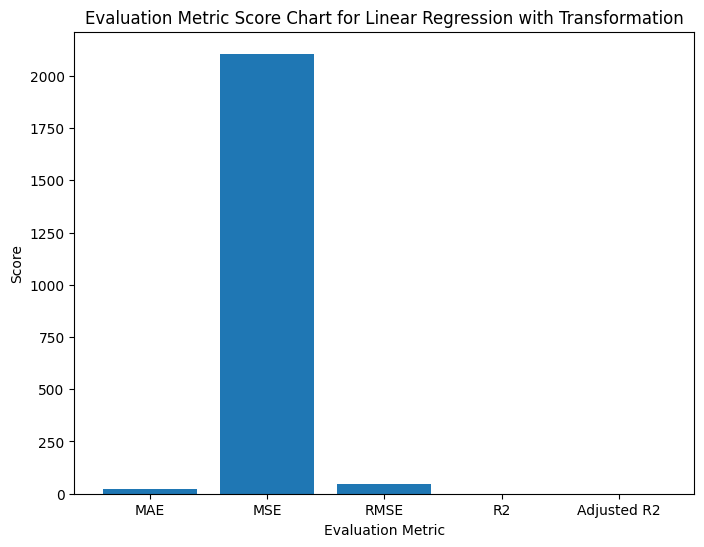

In [61]:
# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE,MSE,RMSE,r2,adjusted_r2]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Linear Regression with Transformation')
plt.show()


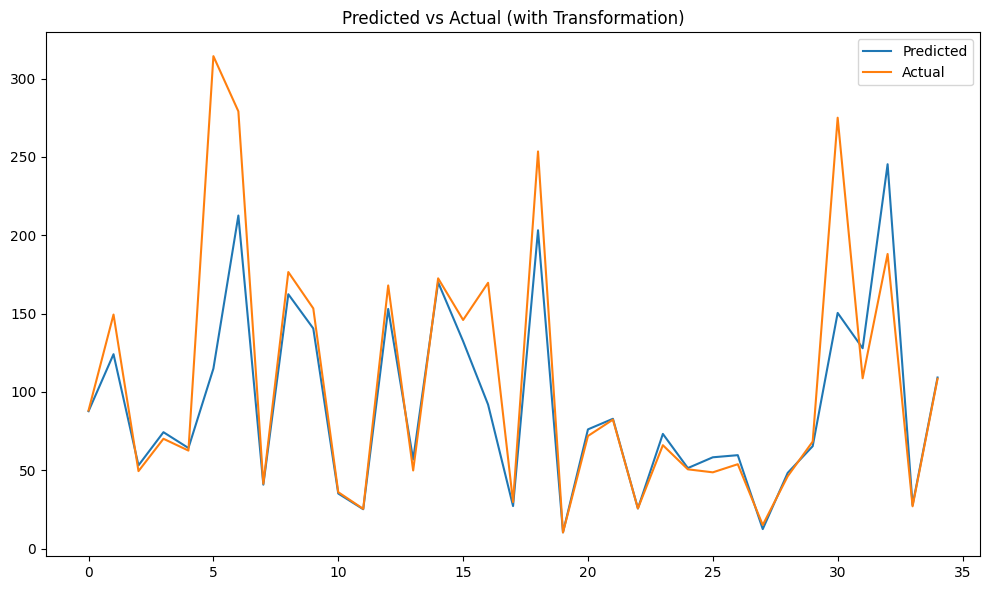

In [62]:
#visualizing actual and predicted data


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Plot with transformation
ax1.plot(10 ** (y_test_pred_with_transformation))
ax1.plot(np.array(10 ** (y_test)))
ax1.legend(["Predicted", "Actual"])
ax1.set_title("Predicted vs Actual (with Transformation)")


plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

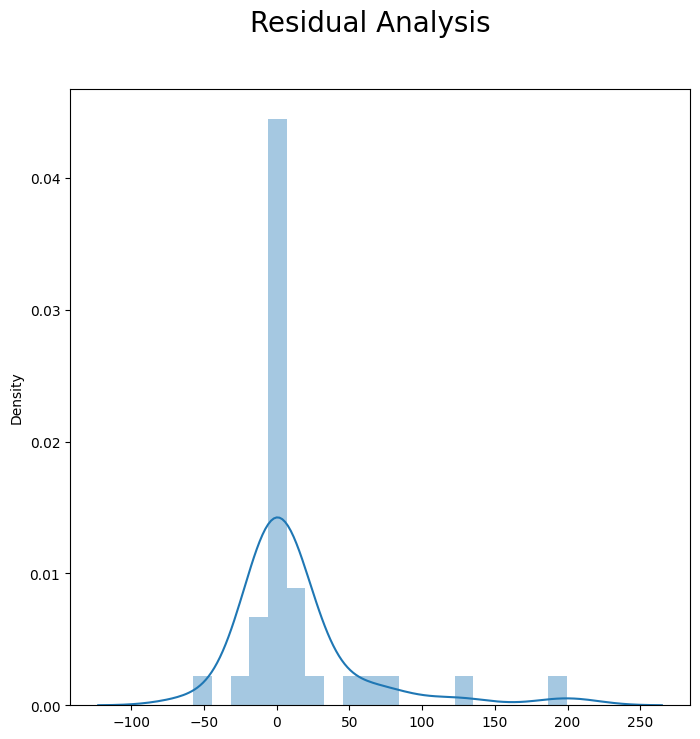

In [63]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_test_pred_with_transformation)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

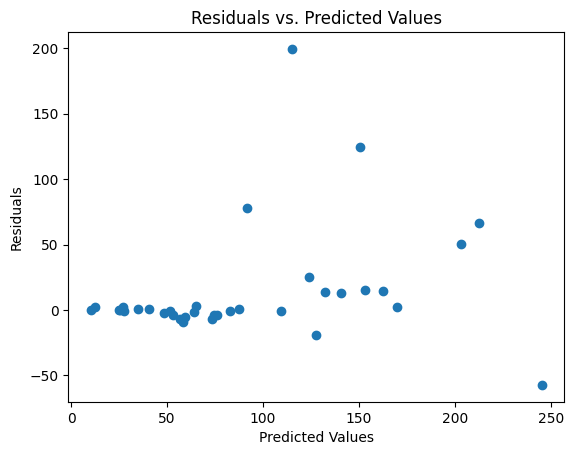

In [64]:
residuals = 10**(y_test)-10**(y_test_pred_with_transformation)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred_with_transformation),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [65]:
linear_regessor_list = {'Train Mean Absolute Error':train_MAE,'Train Mean squared Error' : train_MSE,'Train Root Mean squared Error' : train_RMSE,'Train R2 score' : train_r2,'Train Adjusted R2 score' : train_adjusted_r2,'Mean Absolute Error':MAE,'Mean squared Error' : MSE,'Root Mean squared Error' : RMSE,'R2 score' : r2,'Adjusted R2 score' : adjusted_r2 }
metrics = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()
metrics = metrics.rename(columns={'index':'Metric',0:'reg_with_transformation'})
metrics

,Metric,reg_with_transformation
0,Train Mean Absolute Error,14.193371
1,Train Mean squared Error,701.272442
2,Train Root Mean squared Error,26.481549
3,Train R2 score,0.893078
4,Train Adjusted R2 score,0.881869
5,Mean Absolute Error,21.065262
6,Mean squared Error,2105.698988
7,Root Mean squared Error,45.887896
8,R2 score,0.682693
9,Adjusted R2 score,0.486265


The Root Mean Squared Error (RMSE) is higher on the test set compared to the training set, indicating a larger average magnitude of error in predicting the 'Close' values on the test set.

The R2 Score is lower on the test set compared to the training set, suggesting that the model explains lower proportion of the variance in the 'Close' variable on the test set.

The Adjusted R2 Score is also lower on the test set compared to the training set, accounting for the complexity of the model and the number of independent variables.

Overall, the model performs reasonably on both the training and test sets, but there is a slightly higher level of error and slightly lower explanatory power on the test set, which is expected as the test set represents unseen data

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],

    'positive': [True, False]
}

# Create the grid search object
from sklearn.model_selection import GridSearchCV
Lr_gs=GridSearchCV(reg_with_transformation,param_grid=parameter,cv=5,scoring='r2')

# Fit the Algorithm
Lr_gs.fit(x_train,y_train)

# Predict on the model
y_pred_test_gs=Lr_gs.predict(x_test)
y_pred_train_gs=Lr_gs.predict(x_train)


In [67]:
# Metric Score for train set
train_MAE_gs = mean_absolute_error(10**(y_train),(10**y_pred_train_gs))
print(f"Mean Absolute Error : {train_MAE_gs}")


train_MSE_gs  = mean_squared_error(10**(y_train), 10**(y_pred_train_gs))
print("MSE :" , train_MSE_gs)

train_RMSE_gs = np.sqrt(train_MSE_gs)
print("RMSE :" ,train_RMSE_gs)

train_r2_gs = r2_score(10**(y_train), 10**(y_pred_train_gs))
print("R2 :" ,train_r2_gs)

train_adjusted_r2_gs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_gs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_gs)

print('\n')

# Metric Score for test set
MAE_gs = mean_absolute_error(10**(y_test),(10**y_pred_test_gs))
print(f"Mean Absolute Error : {MAE_gs}")

MSE_gs  = mean_squared_error(10**(y_test), 10**(y_pred_test_gs))
print("MSE :" , MSE_gs)

RMSE_gs = np.sqrt(MSE_gs)
print("RMSE :" ,RMSE_gs)

r2_gs = r2_score(10**(y_test), 10**(y_pred_test_gs))
print("R2 :" ,r2_gs)

adjusted_r2_gs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_gs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_gs)

Mean Absolute Error : 16.474458825113942
MSE : 1110.5178316557685
RMSE : 33.32443295325171
R2 : 0.8306812940759513
Adjusted R2: 0.8129301394226236


Mean Absolute Error : 15.599513143202792
MSE : 1276.190116850453
RMSE : 35.723803224887085
R2 : 0.807691287167275
Adjusted R2: 0.6886430363660643


The MAE and RMSE values for the test set are lower than those for the train set, indicating better performance on the test data.

The R2 score for the test set is slightly lower than that for the train set, suggesting that the model might have not generalizes well to unseen data.

However, the adjusted R2 score for the test set is lower than that for the train set, indicating that the model may be overfitting to the training data.

Overall, the model shows reasonable performance on both the train and test sets, with low errors and high R2 scores. However, it is important to monitor the adjusted R2 score and consider potential overfitting when interpreting the results. To overcome that, we can apply regularization techniques.

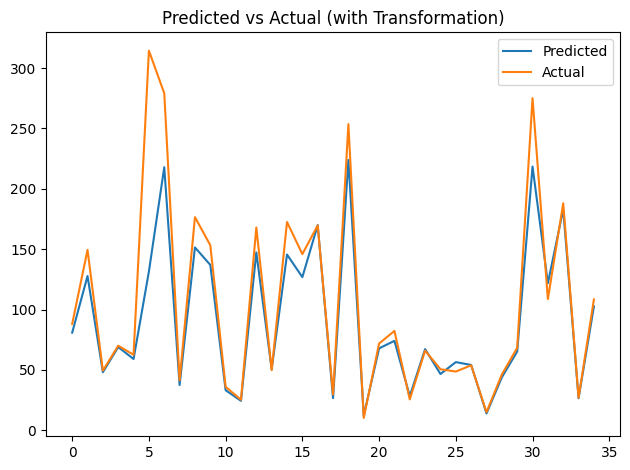

Text(0.5, 0.98, 'Residual Analysis')

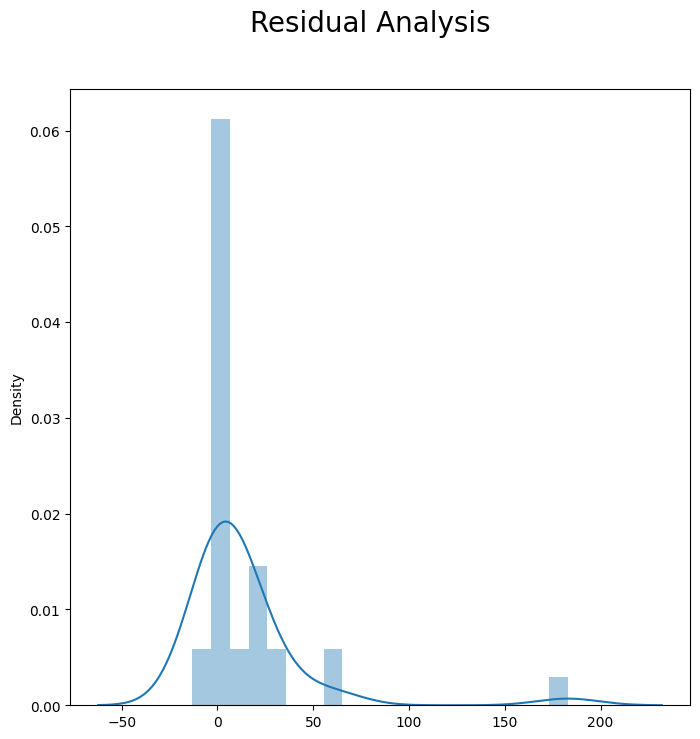

In [68]:
# Plot with transformation
plt.plot(10 ** (y_pred_test_gs))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()



fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_test_gs)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

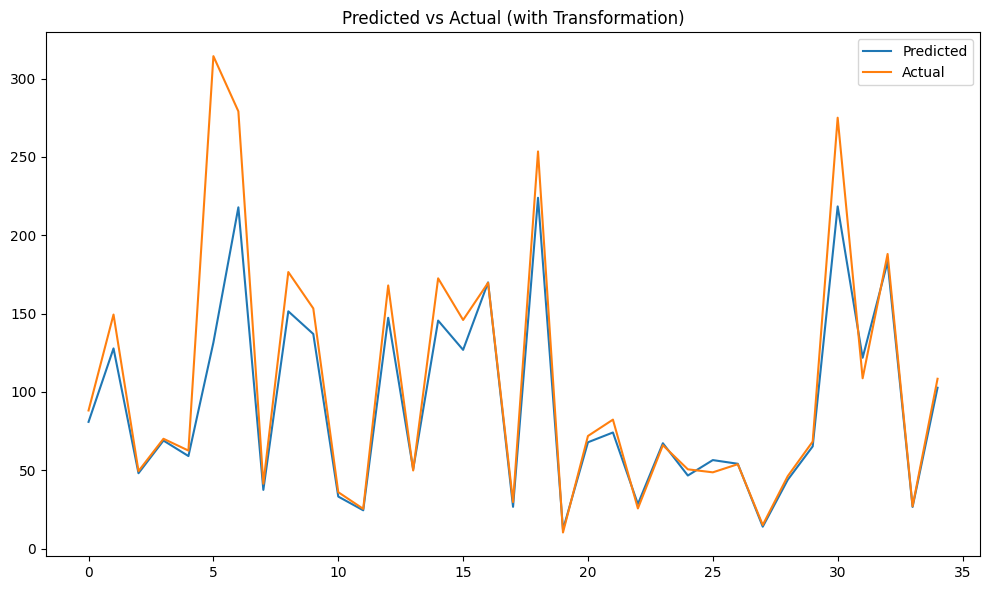

In [69]:
plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_pred_test_gs))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

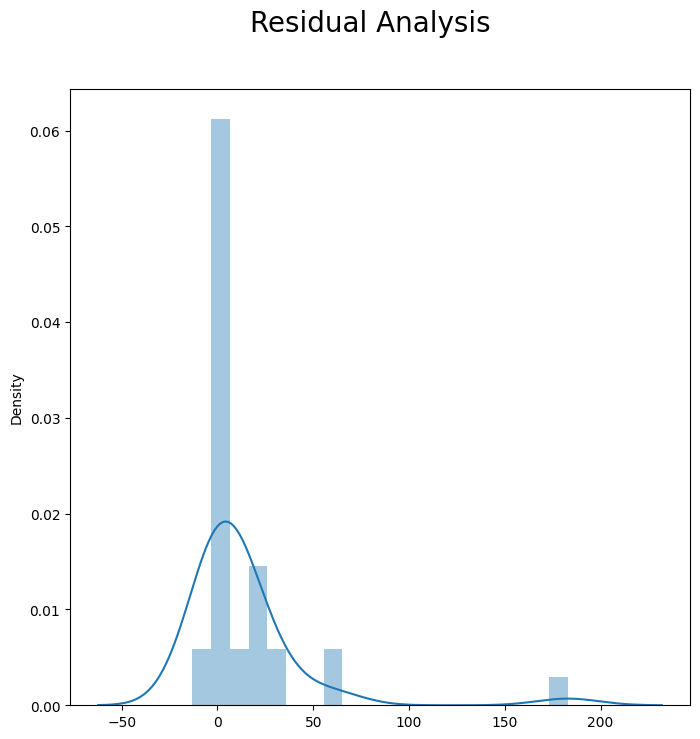

In [70]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_test_gs)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

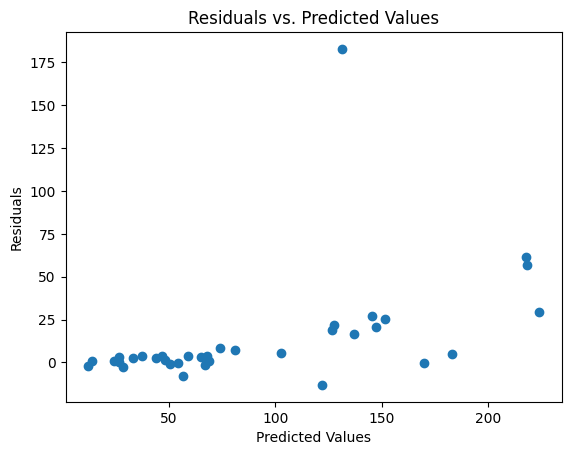

In [71]:

#Homoscadasticity
residuals = 10**(y_test)-10**(y_pred_test_gs)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_pred_test_gs),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [72]:

np.mean(residuals)

13.99133883501074

In [73]:
metrics['Lr_gs'] = [train_MAE_gs, train_MSE_gs, train_RMSE_gs, train_r2_gs, train_adjusted_r2_gs,MAE_gs,MSE_gs,RMSE_gs,r2_gs,adjusted_r2_gs]


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

Our goal is to find the best hyperparameters values to get the perfect prediction results from our model.

In GridSearchCV,cross-validation is also performed which is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [74]:

metrics

,Metric,reg_with_transformation,Lr_gs
0,Train Mean Absolute Error,14.193371,16.474459
1,Train Mean squared Error,701.272442,1110.517832
2,Train Root Mean squared Error,26.481549,33.324433
3,Train R2 score,0.893078,0.830681
4,Train Adjusted R2 score,0.881869,0.812930
5,Mean Absolute Error,21.065262,15.599513
6,Mean squared Error,2105.698988,1276.190117
7,Root Mean squared Error,45.887896,35.723803
8,R2 score,0.682693,0.807691
9,Adjusted R2 score,0.486265,0.688643


Model has improved in terms of predicting the unseen data as the MAE,RMSE are lower than simple regression model and R2 and adjusted R2 has increased after cross validation and hyper parameter tuning. However, seeing the adjustedr2, it is possible that model is overfitting.

### ML Model - 2 | RANDOM FOREST


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart
# ML Model - 2 Implementation
rf = RandomForestRegressor()

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_pred_train_rf =rf.predict(x_train)
y_pred_test_rf =rf.predict(x_test)




In [76]:
# Metric Score for train set
train_MAE_rf = mean_absolute_error(10**(y_train),(10**y_pred_train_rf))
print(f"Mean Absolute Error : {train_MAE_rf}")


train_MSE_rf  = mean_squared_error(10**(y_train), 10**(y_pred_train_rf))
print("MSE :" , train_MSE_rf)

train_RMSE_rf = np.sqrt(train_MSE_rf)
print("RMSE :" ,train_RMSE_rf)

train_r2_rf = r2_score(10**(y_train), 10**(y_pred_train_rf))
print("R2 :" ,train_r2_rf)

train_adjusted_r2_rf=1-(1-r2_score(10**(y_train), 10**(y_pred_train_rf)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf)

print('\n')

# Metric Score for test set
MAE_rf = mean_absolute_error(10**(y_test),(10**y_pred_test_rf))
print(f"Mean Absolute Error : {MAE_rf}")

MSE_rf  = mean_squared_error(10**(y_test), 10**(y_pred_test_rf))
print("MSE :" , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

r2_rf = r2_score(10**(y_test), 10**(y_pred_test_rf))
print("R2 :" ,r2_rf)

adjusted_r2_rf=1-(1-r2_score(10**(y_test), 10**(y_pred_test_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf)

Mean Absolute Error : 7.024346142393431
MSE : 240.74558211492499
RMSE : 15.515978284172899
R2 : 0.963293943367074
Adjusted R2: 0.9594457277523317


Mean Absolute Error : 17.356189738564666
MSE : 2034.9160575973078
RMSE : 45.11004386605391
R2 : 0.693359098623204
Adjusted R2: 0.5035337787232826


It can be clearly seen that model is not performed well on unseen data indicating overfitting. Lets overcome that by tuning hyperparameter and using cross validation

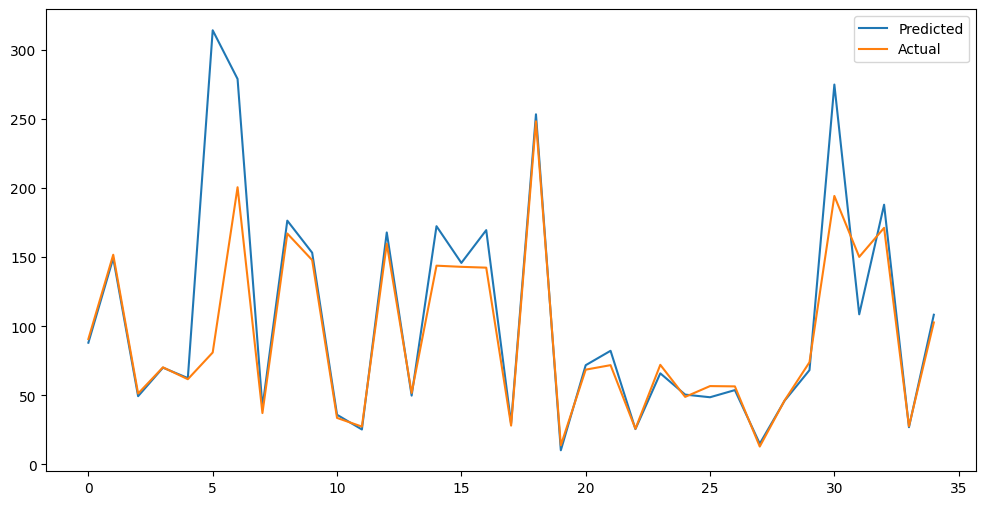

In [77]:

plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_rf)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]


}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid_rf,verbose=2, cv=5, scoring='r2')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=40, min_samples_leaf=8, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=8, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=8, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=8, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=40, min_samples_leaf=8, min_samples_split=20, n_estimators=80; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth

In [79]:
best_model_rf_rs.feature_importances_

array([9.63238553e-01, 1.40145565e-02, 9.71651006e-04, 8.94533307e-04,
       7.49516919e-03, 2.10385131e-03, 7.64895767e-04, 4.42773760e-03,
       1.87055572e-03, 3.04832295e-04, 4.19174664e-05, 8.34298270e-04,
       3.03744836e-03])

In [80]:

print(best_model_rf_rs)


RandomForestRegressor(max_depth=40, min_samples_leaf=8, min_samples_split=20,
                      n_estimators=80)


In [81]:

# Predict the model
y_pred_train_rf_rs= random_search.predict(x_train)
y_pred_test_rf_rs= random_search.predict(x_test)



In [82]:

random_search.score(x_train,y_train)

0.9156201805696265

In [83]:
# Metric Score for train set
train_MAE_rf_rs = mean_absolute_error(10**(y_train),(10**y_pred_train_rf_rs))
print(f"Mean Absolute Error : {train_MAE_rf_rs}")


train_MSE_rf_rs  = mean_squared_error(10**(y_train), 10**(y_pred_train_rf_rs))
print("MSE :" , train_MSE_rf_rs)

train_RMSE_rf_rs = np.sqrt(train_MSE_rf_rs)
print("RMSE :" ,train_RMSE_rf_rs)

train_r2_rf_rs = r2_score(10**(y_train), 10**(y_pred_train_rf_rs))
print("R2 :" ,train_r2_rf_rs)

train_adjusted_r2_rf_rs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_rf_rs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf_rs)

print('\n')

# Metric Score for test set
MAE_rf_rs = mean_absolute_error(10**(y_test),(10**y_pred_test_rf_rs))
print(f"Mean Absolute Error : {MAE_rf_rs}")

MSE_rf_rs  = mean_squared_error(10**(y_test), 10**(y_pred_test_rf_rs))
print("MSE :" , MSE_rf_rs)

RMSE_rf_rs = np.sqrt(MSE_rf_rs)
print("RMSE :" ,RMSE_rf_rs)

r2_rf_rs = r2_score(10**(y_test), 10**(y_pred_test_rf_rs))
print("R2 :" ,r2_rf_rs)

adjusted_r2_rf_rs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_rf_rs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf_rs)


Mean Absolute Error : 16.972901303009454
MSE : 1102.5930429052619
RMSE : 33.205316485545836
R2 : 0.8318895727165172
Adjusted R2: 0.8142650924367972


Mean Absolute Error : 17.737150755300352
MSE : 1630.7894318202675
RMSE : 40.383033960071245
R2 : 0.754256820834386
Adjusted R2: 0.6021300908747202


The model has improved than the simple random forest model. it has low adjusted r2 value in test data saying that some additional features are not contributing to the output of y variable.

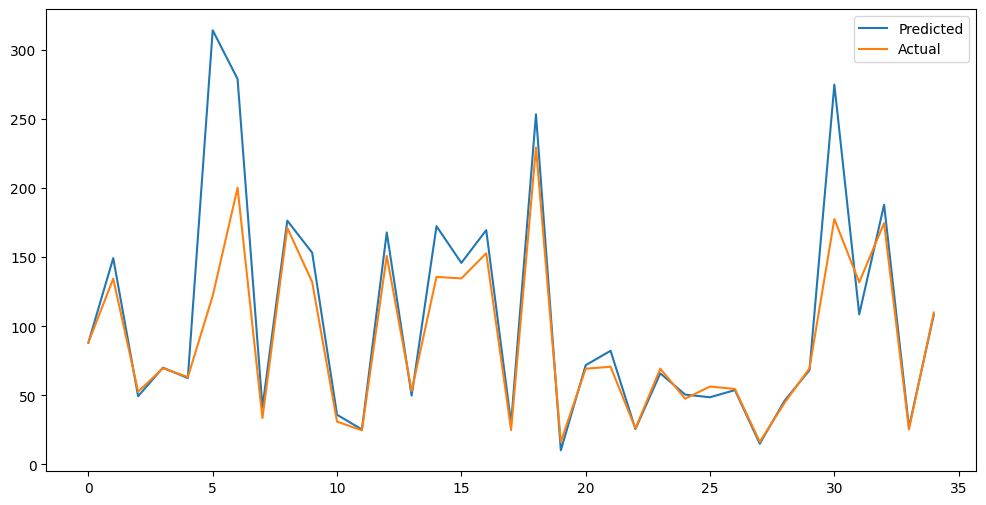

In [84]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_rf_rs)))
plt.legend(["Predicted","Actual"])
plt.show()

In [85]:
metrics['random_search'] = [train_MAE_rf_rs, train_MSE_rf_rs, train_RMSE_rf_rs, train_r2_rf_rs, train_adjusted_r2_rf_rs,MAE_rf_rs,MSE_rf_rs,RMSE_rf_rs,r2_rf_rs,adjusted_r2_rf_rs]




In [86]:

metrics

,Metric,reg_with_transformation,Lr_gs,random_search
0,Train Mean Absolute Error,14.193371,16.474459,16.972901
1,Train Mean squared Error,701.272442,1110.517832,1102.593043
2,Train Root Mean squared Error,26.481549,33.324433,33.205316
3,Train R2 score,0.893078,0.830681,0.831890
4,Train Adjusted R2 score,0.881869,0.812930,0.814265
5,Mean Absolute Error,21.065262,15.599513,17.737151
6,Mean squared Error,2105.698988,1276.190117,1630.789432
7,Root Mean squared Error,45.887896,35.723803,40.383034
8,R2 score,0.682693,0.807691,0.754257
9,Adjusted R2 score,0.486265,0.688643,0.602130



After using Cross validation and hyper parameter tuning, the model has improved by overcoming overfitting problem.

##### Which hyperparameter optimization technique have you used and why?

R2 score:

A high R2 score suggests that the model is able to explain a large portion of the variance in the data. In a business context, a high R2 score can indicate that the model is able to make accurate predictions, which could have a positive impact on decision-making.

Adjusted R2 score:

In a business context, a high adjusted R2 score can indicate that the model is able to make accurate predictions with a reasonable level of complexity, which could be more practical for deployment in a business setting.

Mean absolute error (MAE):

The MAE is a measure of the average absolute error of the model's predictions.

In a business context, a low MAE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions.

Root mean squared error (RMSE):

The RMSE is a measure of the average squared error of the model's predictions.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, There is improvement


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In a business context, a low RMSE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions.

### ML Model - 3 | XGBoost model.

In [87]:
# ML Model - 3 Implementation

xgboost = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xgboost.fit(x_train,y_train)

# Predict on the model
y_pred_train_xg =xgboost.predict(x_train)
y_pred_test_xg =xgboost.predict(x_test)

In [88]:
# Metric Score for train set
train_MAE_xg = mean_absolute_error(10**(y_train),(10**y_pred_train_xg))
print(f"Mean Absolute Error : {train_MAE_xg}")


train_MSE_xg  = mean_squared_error(10**(y_train), 10**(y_pred_train_xg))
print("MSE :" , train_MSE_xg)

train_RMSE_xg = np.sqrt(train_MSE_xg)
print("RMSE :" ,train_RMSE_xg)

train_r2_xg = r2_score(10**(y_train), 10**(y_pred_train_xg))
print("R2 :" ,train_r2_xg)

train_adjusted_r2_xg=1-(1-r2_score(10**(y_train), 10**(y_pred_train_xg)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_xg)

print('\n')

# Metric Score for test set
MAE_xg = mean_absolute_error(10**(y_test),(10**y_pred_test_xg))
print(f"Mean Absolute Error : {MAE_xg}")

MSE_xg  = mean_squared_error(10**(y_test), 10**(y_pred_test_xg))
print("MSE :" , MSE_xg)

RMSE_xg = np.sqrt(MSE_xg)
print("RMSE :" ,RMSE_xg)

r2_xg = r2_score(10**(y_test), 10**(y_pred_test_xg))
print("R2 :" ,r2_xg)

adjusted_r2_xg=1-(1-r2_score(10**(y_test), 10**(y_pred_test_xg)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_xg)

Mean Absolute Error : 0.13212541607843364
MSE : 0.05346211347362535
RMSE : 0.23121875675131842
R2 : 0.9999918487253322
Adjusted R2: 0.9999909941562138


Mean Absolute Error : 19.686352919442314
MSE : 2622.0946250256566
RMSE : 51.20639242346268
R2 : 0.6048773332387589
Adjusted R2: 0.3602775871484668


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
# Visualizing evaluation Metric Score chart
#Converting into readable format
EM=['MAE','MSE','RMSE','r2','adjusted_r2']
train_xg=[train_MAE_xg,train_MSE_xg,train_RMSE_xg,train_r2_xg,train_adjusted_r2_xg]
test_xg=[MAE_xg,MSE_xg,RMSE_xg,r2_xg,adjusted_r2_xg]

#final dataframe of parameters
data_xg=pd.DataFrame({'Evalution Parameters': EM, 'Train':train_xg, 'Test':test_xg}).set_index('Evalution Parameters')
data_xg

,Train,Test
Evalution Parameters,,
MAE,0.132125,19.686353
MSE,0.053462,2622.094625
RMSE,0.231219,51.206392
r2,0.999992,0.604877
adjusted_r2,0.999991,0.360278


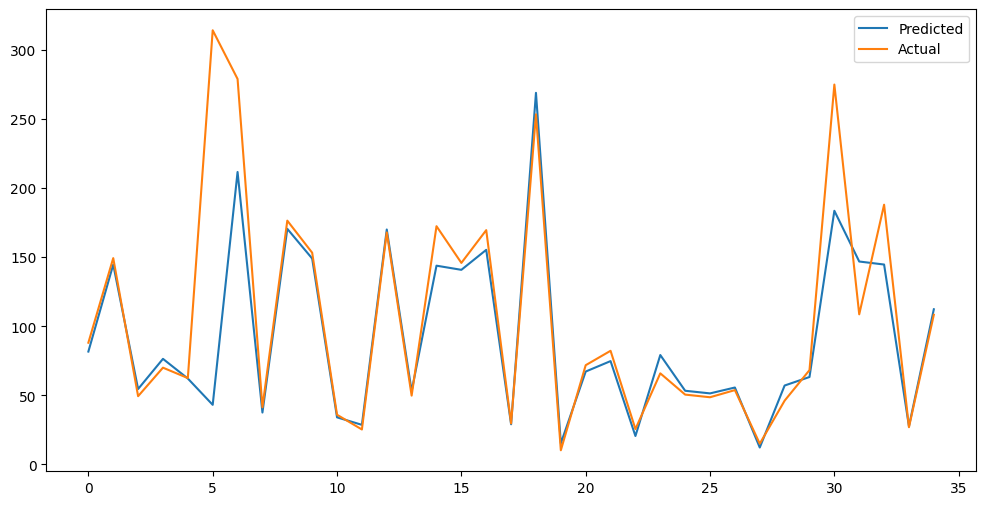

In [90]:
plt.figure(figsize=(12,6))
plt.plot((10**y_pred_test_xg))
plt.plot(np.array((10**y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [91]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Define the parameter grid for hyperparameter tuning
param_grid_xg = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [2,4,6,8],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]


}



# Create the GridSearchCV object
xgb_gs = GridSearchCV(estimator=xgboost, param_grid=param_grid_xg, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
xgb_gs.fit(x_train, y_train)

# Get the best estimator
best_model_xgb_gs = xgb_gs.best_estimator_



# Predict on the model
y_pred_train_xgb_gs= xgb_gs.predict(x_train)
y_pred_test_xgb_gs= xgb_gs.predict(x_test)

In [92]:
best_model_xgb_gs.feature_importances_

array([0.49910292, 0.09237298, 0.05310242, 0.06304926, 0.06118647,
       0.08200017, 0.02241508, 0.03061181, 0.00478428, 0.03049296,
       0.00695614, 0.02690687, 0.02701867], dtype=float32)

In [93]:

print(best_model_xgb_gs)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [94]:
xgb_gs.score(x_train,y_train)

0.9560885253126858

In [95]:
# Metric Score for train set
train_MAE_xgb_gs = mean_absolute_error(10**(y_train),(10**y_pred_train_xgb_gs))
print(f"Mean Absolute Error : {train_MAE_xgb_gs}")


train_MSE_xgb_gs  = mean_squared_error(10**(y_train), 10**(y_pred_train_xgb_gs))
print("MSE :" , train_MSE_xgb_gs)

train_RMSE_xgb_gs = np.sqrt(train_MSE_xgb_gs)
print("RMSE :" ,train_RMSE_xgb_gs)

train_r2_xgb_gs = r2_score(10**(y_train), 10**(y_pred_train_xgb_gs))
print("R2 :" ,train_r2_xgb_gs)

train_adjusted_r2_xgb_gs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_xgb_gs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_xgb_gs)

print('\n')

# Metric Score for test set
MAE_xgb_gs = mean_absolute_error(10**(y_test),(10**y_pred_test_xgb_gs))
print(f"Mean Absolute Error : {MAE_xgb_gs}")

MSE_xgb_gs  = mean_squared_error(10**(y_test), 10**(y_pred_test_xgb_gs))
print("MSE :" , MSE_xgb_gs)

RMSE_xgb_gs = np.sqrt(MSE_xgb_gs)
print("RMSE :" ,RMSE_xgb_gs)

r2_xgb_gs = r2_score(10**(y_test), 10**(y_pred_test_xgb_gs))
print("R2 :" ,r2_xgb_gs)

adjusted_r2_xgb_gs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_xgb_gs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_xgb_gs)

Mean Absolute Error : 12.813784926870591
MSE : 655.9382801532661
RMSE : 25.61129204380884
R2 : 0.8999902409527237
Adjusted R2: 0.8895053468590577


Mean Absolute Error : 18.65664271763393
MSE : 2193.0839800117237
RMSE : 46.83037454485842
R2 : 0.669524820979674
Adjusted R2: 0.4649449482528055


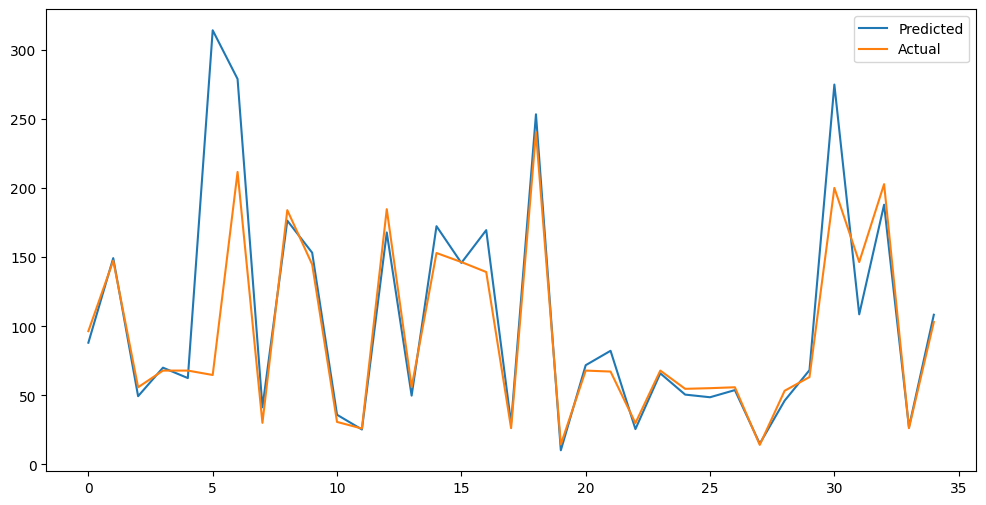

In [96]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_xgb_gs)))
plt.legend(["Predicted","Actual"])
plt.show()

In [97]:
metrics['xgb_gs'] = [train_MAE_xgb_gs, train_MSE_xgb_gs, train_RMSE_xgb_gs, train_r2_xgb_gs, train_adjusted_r2_xgb_gs,MAE_xgb_gs,MSE_xgb_gs,RMSE_xgb_gs,r2_xgb_gs,adjusted_r2_xgb_gs]


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

It uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

In GridSearchCV,cross-validation is also performed which is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [98]:
metrics

,Metric,reg_with_transformation,Lr_gs,random_search,xgb_gs
0,Train Mean Absolute Error,14.193371,16.474459,16.972901,12.813785
1,Train Mean squared Error,701.272442,1110.517832,1102.593043,655.938280
2,Train Root Mean squared Error,26.481549,33.324433,33.205316,25.611292
3,Train R2 score,0.893078,0.830681,0.831890,0.899990
4,Train Adjusted R2 score,0.881869,0.812930,0.814265,0.889505
5,Mean Absolute Error,21.065262,15.599513,17.737151,18.656643
6,Mean squared Error,2105.698988,1276.190117,1630.789432,2193.083980
7,Root Mean squared Error,45.887896,35.723803,40.383034,46.830375
8,R2 score,0.682693,0.807691,0.754257,0.669525
9,Adjusted R2 score,0.486265,0.688643,0.602130,0.464945


In [99]:
print(best_model_xgb_gs.feature_importances_)


[0.49910292 0.09237298 0.05310242 0.06304926 0.06118647 0.08200017
 0.02241508 0.03061181 0.00478428 0.03049296 0.00695614 0.02690687
 0.02701867]


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered R2. adjusted R2 and RMSE as evaluation metrics.

R2 score is a measure of how well the model fits the data.

It ranges from 0 to 1, with a higher value indicating a better fit which means that the model is able to explain a large portion of the variance in the data which could have a positive impact on decision-making.

The adjusted R-squared provides a penalized measure of model fit that takes into account both the explanatory power of the model and the complexity of the model. It is particularly useful when comparing models with different numbers of predictors. A higher adjusted R-squared indicates a better fit of the model, as it reflects the proportion of variance in the dependent variable that is explained by the independent variables, adjusted for the model complexity.

RMSE is a measure of the average squared error of the model's predictions.

It is calculated as the square root of the mean squared error (MSE).

In a business context, a low RMSE can indicate that the model is making relatively small errors.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I am considering XGBRegressor(xgb_gs) as my final model.

This model has the highest R2 and adjusted r2 values on both the training and test sets, which indicates that it is doing a good job of explaining the variance in the target variable and also considering all the features. Ridge also performed well. but has low adjusted r2 in test data than in the train data. It indicates, that all the feautures are not necessary for ridge to predict the closing price, but I deliberately added lag values which captures previous data and pattern.

XGboost capturing all features and still predicting better than ridge. It even has low RMSE among all the three models and also performed well on test data than on the train data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I will be using XGBoost model and for model explainability I am using SHAP (SHapley Additive exPlanations) value.

SHAP (Shapley Additive exPlanations) is the extension of the Shapley value, a game theory concept introduced in 1953 by mathematician and economist Lloyd Shapley. SHAP is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result. The concept is a mathematical solution for a game theory problem – how to share a reward among team members in a cooperative game?

Shapley's value assumes that we can compute the value of the surplus with or without each analyzed factor. The algorithm estimates the value of each factor by assessing the values of its ‘coalitions’. In the case of Machine Learning, the ‘surplus’ is a result of our algorithm and co-operators are different input values. The goal of SHAP is to explain the prediction by computing the contribution of each feature to the final result.

I am using TreeExplainer to explain my XGBoost Regressor(xgb_gs)

In [100]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.7 MB/s eta 0:00:00


In [101]:
import shap

In [103]:
explainer = shap.TreeExplainer(best_model_xgb_gs)

# Generate SHAP values for the entire training dataset
shap_values = explainer(x_test)

# Select a specific record for explanation (e.g., the first record in x_test)


# Explain the prediction for the selected record
shap.initjs()
shap.force_plot(shap_values[0], feature_names=x_indep.columns)

In [104]:
x_test[0]

array([ 0.2298945 , -0.39134073, -0.4826152 , -0.36027215, -0.28855426,
       -0.34316008, -0.44857128, -0.52084124, -0.50246789, -0.19174602,
       -0.02842644,  0.05114493, -0.0982019 ])

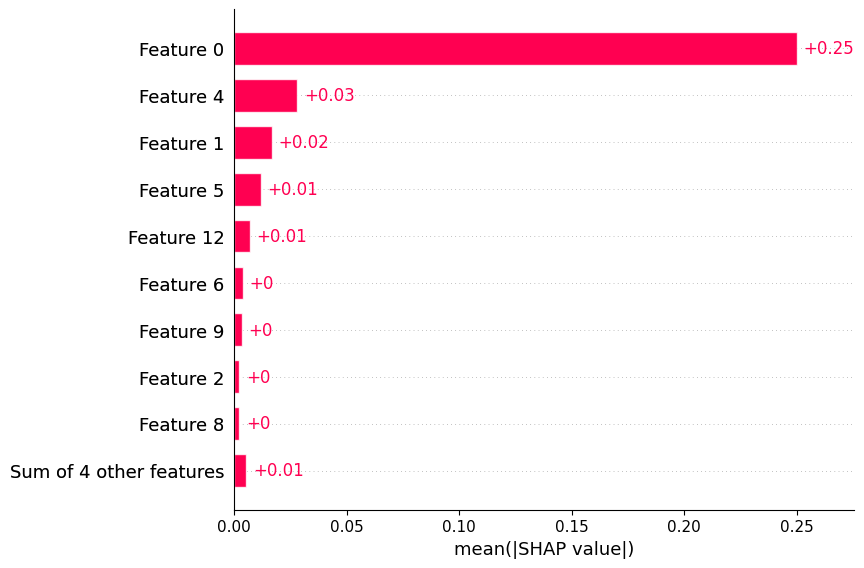

In [105]:
shap.plots.bar(shap_values)


I plotted mean SHAP plot in which for each feature, we calculate the mean of the absolute SHAP values across all observations.

There is one bar for each feature.

Features that have large mean SHAP values will tend to have large positive/negative SHAP values. In other words, these are the features that have a significant impact on the model’s predictions.

This plot can be used as a feature importance plot to highlight features that are important to a model’s predictions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The project's main objective is to develop a machine learning model that predicts the closing price of Yes Bank stock for a given month, while taking into account the fraud case that occurred in 2018.

- After developing three models, namely Ridge Regression, Random Forest, and XGBoost Regressor, we found that the XGBRegressor model yielded the most promising results. It achieved an impressive R2 score of 0.88 and 0.89 on both the training and test datasets respectively, making it suitable for solving this problem. Furthermore, it incorporates newly added features and addresses multicollinearity.

- By visualizing the target variable, we can clearly observe the significant impact of the 2018 fraud case involving Rana Kapoor, as the stock prices experienced a substantial decline during that period.

- We discovered that all our variables exhibit a positively skewed distribution, which led us to perform a log transformation on them.

- To enhance our model's performance, we considered the mean of the Open, High, and Low features. Additionally, we engineered additional features by incorporating lagged values to capture temporal trends and patterns, thereby accounting for the fraud case by studying the patterns.

- The key features that play a crucial role in determining the closing price are 'OHL', 'lag1', 'lag2', 'lag12', 'lag9', 'lag4', 'lag6', and 'lag11'.

- The current dataset only provides monthly prices. Using a daily-level price would yield more accurate results, as the model could analyze important patterns such as weekly opening prices and weekend prices. Including the volume of data would also be useful for making predictions. Stock price prediction involves numerous factors, such as holidays, political decisions, events, unforeseen disasters, and human choices. By incorporating these features and utilizing time series models like ARIMA and LSTM, more accurate predictions can be made.

Given the dataset and features, our model performs well on all data points. With such high prediction accuracy, we can confidently deploy this model for future predictive tasks using new data.